In [1]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from shared.training import train_classifier
import matplotlib.pyplot as plt

torch.manual_seed(42)

datasets = {}
loaders = {}

images = torch.load("03_baseline_cnn/data/extracted_features/basedata.pt")
labels = torch.load("03_baseline_cnn/data/extracted_features/basedata_labels.pt")

dataset = torch.utils.data.TensorDataset(images[:, :500], labels)

datasets = {}
loaders = {}

for split, dataset in zip(["train", "val", "test"], torch.utils.data.random_split(dataset, (0.7, 0.15, 0.15))):
    datasets[split] = dataset
    loaders[split] = DataLoader(dataset, batch_size=(32 if split == "train" else len(dataset)), shuffle=(split == "train"))

In [2]:
model = nn.Sequential(
    nn.Linear(datasets["train"][0][0].shape[0], len(torch.unique(labels))),
)

def get_model_inputs_from_batch(batch):
    return [batch[0]]
def get_labels_from_batch(batch):
    return batch[1]

model.get_model_inputs_from_batch = get_model_inputs_from_batch
model.get_labels_from_batch = get_labels_from_batch

Epoch    T Loss  T Acc  V Loss  V Acc

1/30     1.273   0.354   1.124   0.567
2/30     1.050   0.596   0.996   0.580
3/30     0.945   0.590   0.926   0.647
4/30     0.860   0.670   0.892   0.667
5/30     0.818   0.688   0.879   0.600
6/30     0.781   0.697   0.832   0.687
7/30     0.745   0.745   0.820   0.700
8/30     0.712   0.751   0.791   0.693
9/30     0.691   0.771   0.772   0.693
10/30    0.667   0.768   0.770   0.713
11/30    0.646   0.776   0.750   0.733
12/30    0.628   0.804   0.736   0.727
13/30    0.612   0.797   0.742   0.733
14/30    0.600   0.800   0.724   0.720
15/30    0.581   0.808   0.709   0.707
16/30    0.567   0.821   0.707   0.740
17/30    0.553   0.824   0.693   0.740
18/30    0.544   0.821   0.684   0.733
19/30    0.531   0.830   0.684   0.740
20/30    0.520   0.849   0.690   0.740
21/30    0.516   0.836   0.671   0.767
22/30    0.501   0.840   0.665   0.767
23/30    0.491   0.857   0.663   0.727
24/30    0.478   0.857   0.661   0.747
25/30    0.470   0.866   

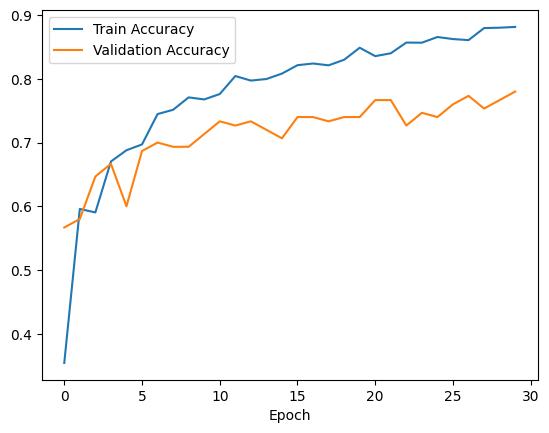

In [3]:

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Reduced learning rate

train_accs, val_accs = train_classifier(
    N_epochs=30,
    model=model,
    train_dataloader=loaders["train"],
    val_dataloader=loaders["val"],
    optimizer=optimizer,
    loss=loss,
)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

Using only the first 500 extracted features or using the full 960 doesn't give a performance boost, despite the fact that this also increases num of params in my fc nn. Will try to use PCA.